<a href="https://colab.research.google.com/github/NicolasSocquetJuglard/TP2_ML/blob/main/TP2byTuthur.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [62]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

from sklearn import svm
from sklearn import metrics
from sklearn import preprocessing
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error

from google.colab import files

In [3]:
# Load the dataset
uploaded = files.upload()

Saving heart.csv to heart (1).csv


In [8]:
# Print the head of the dataset (4 first patients data)

df = pd.read_csv('heart.csv', delimiter=',')

df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [9]:
# Check for null value
df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

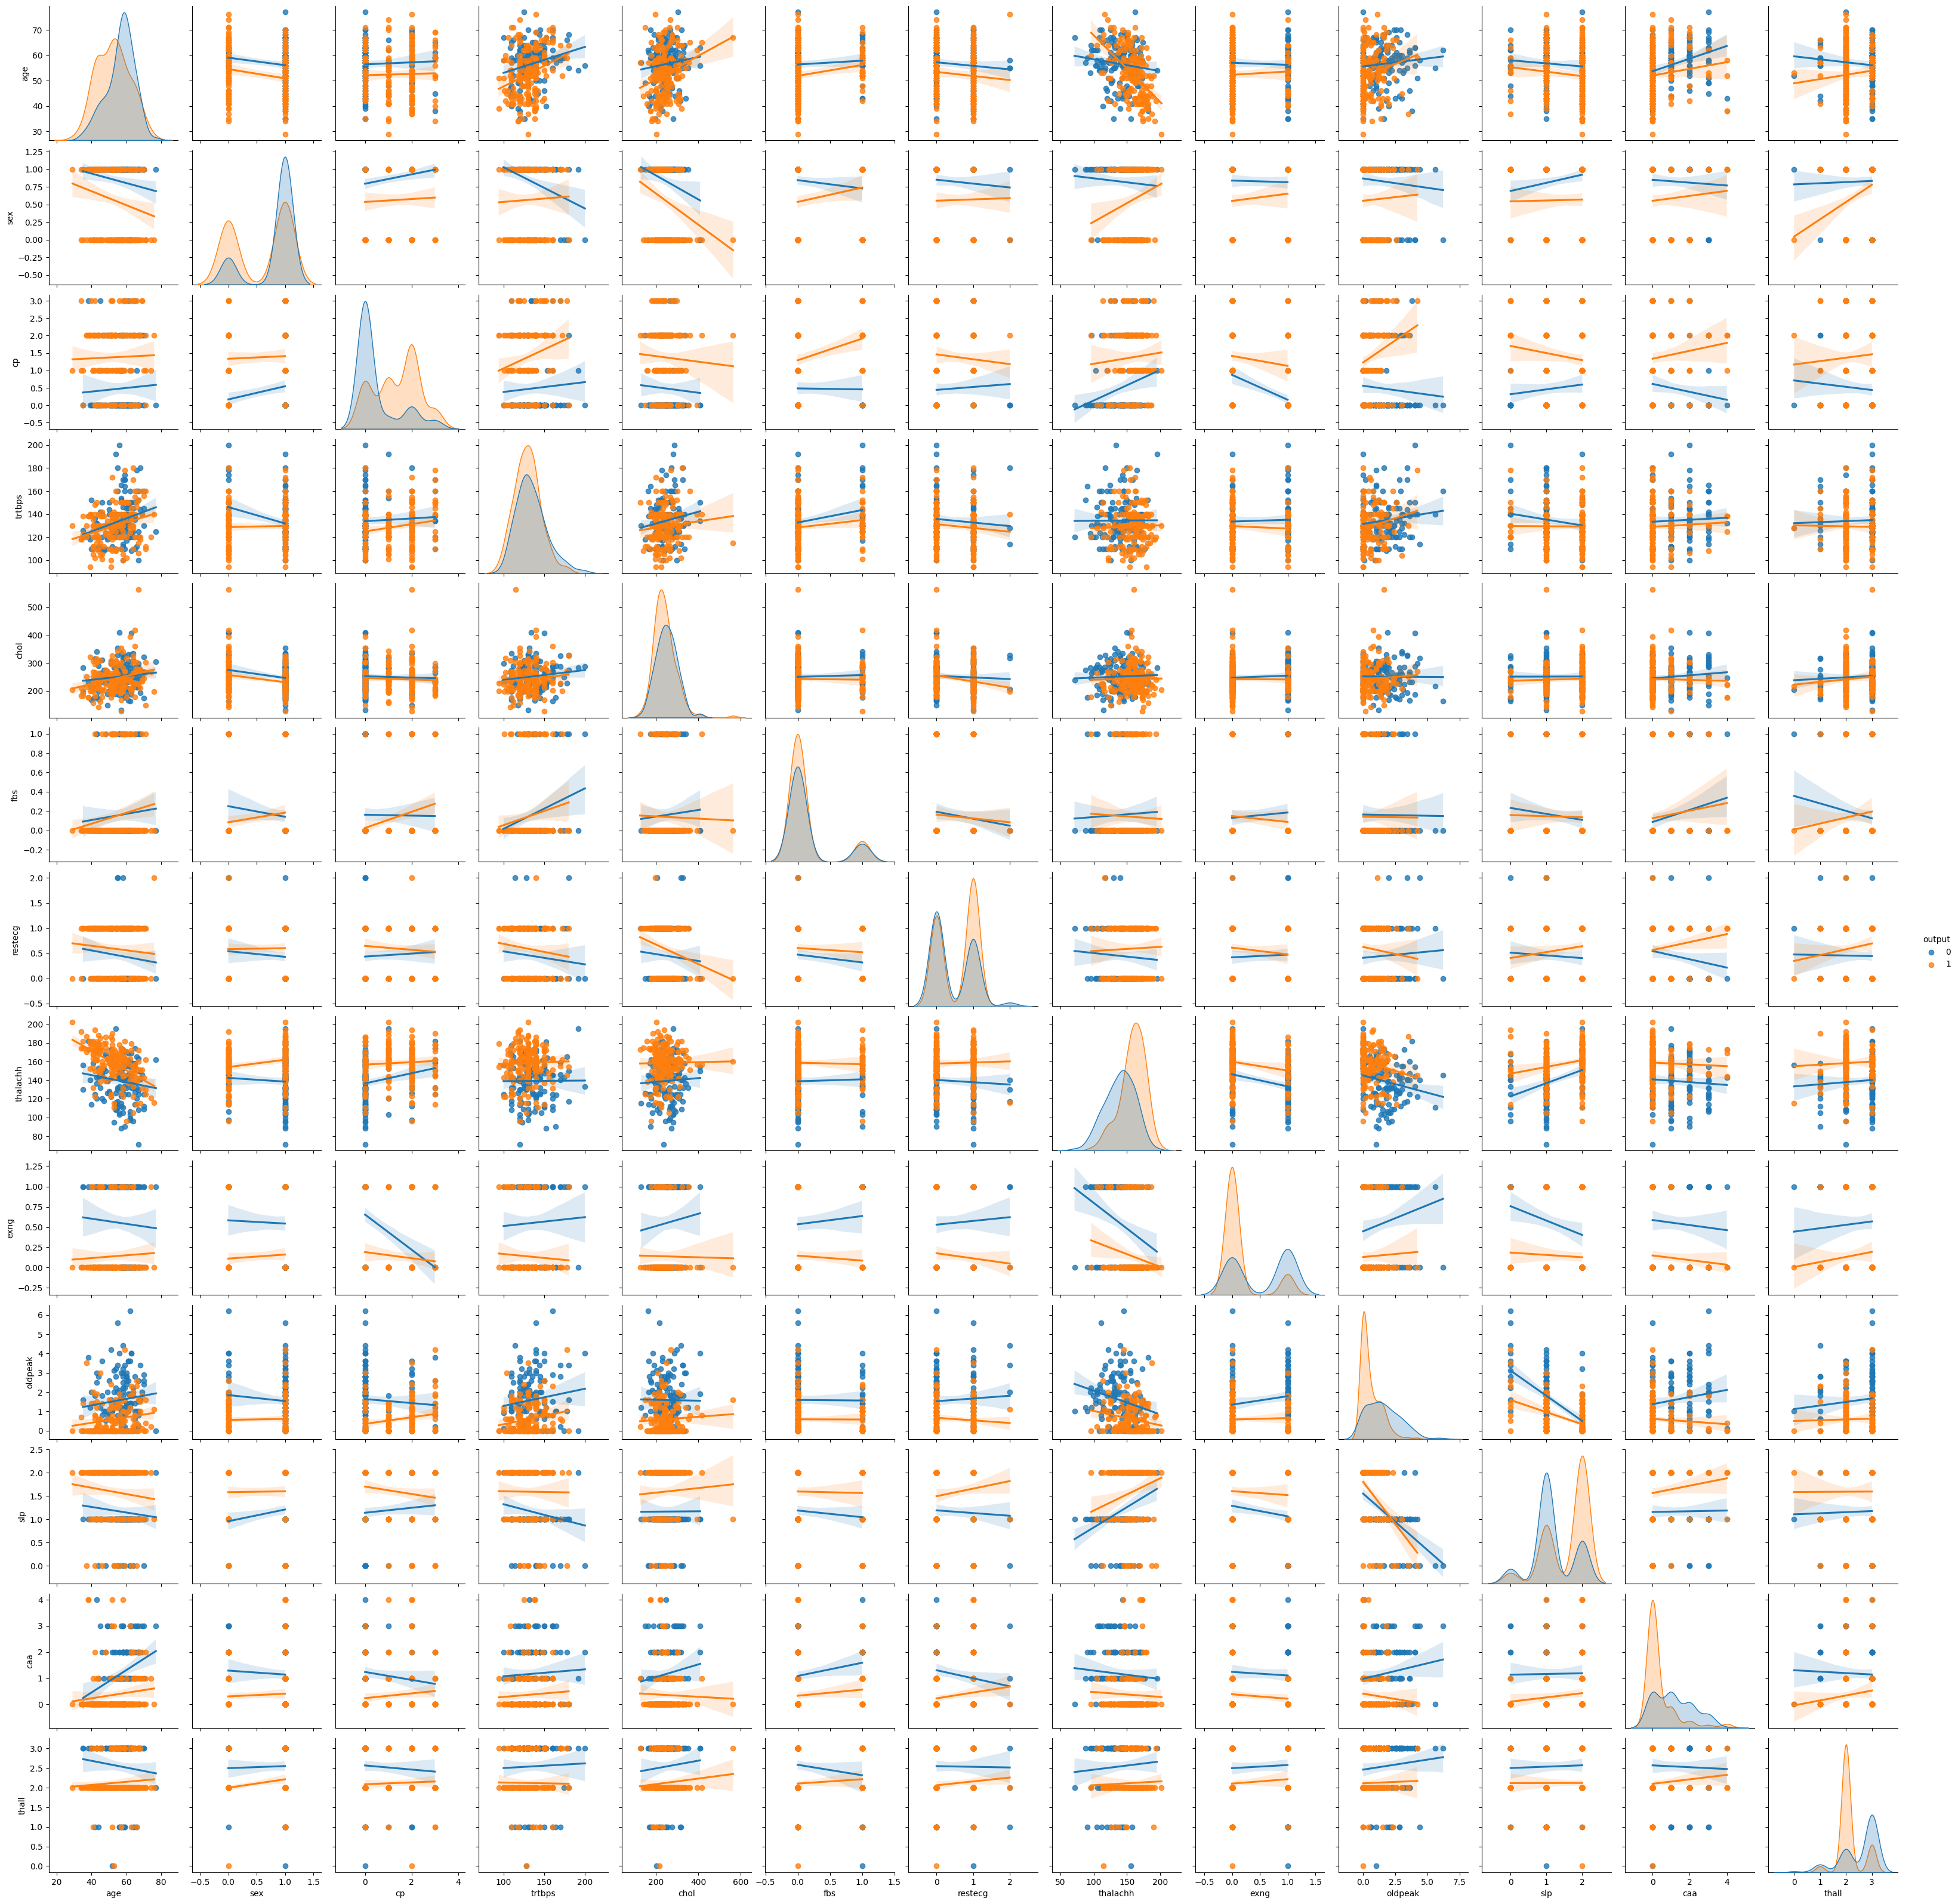

In [10]:
# Visualize the distribution of each feature on graph 
# according to their link with the target

sb.pairplot(df, hue='output', kind="reg")

In [11]:
# Verif the size of df
df.shape


(303, 14)

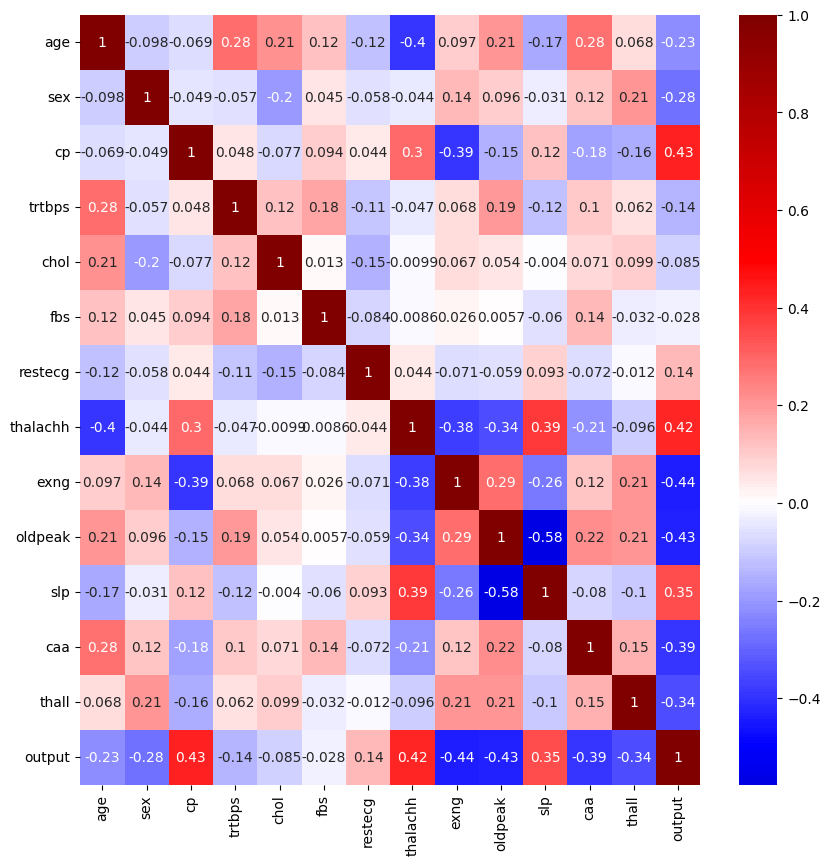

In [32]:
# Examine the correlation between the features
fig, ax = plt.subplots(figsize=(10, 10));
sb.heatmap(df.corr(), annot=True, cmap="seismic", center=0, fmt='.2g');

In [42]:
# Show the features in order of their correlation with the target (stress_level)

abs(df[df.columns[:]].corr()['output'][:]).sort_values(ascending=False).to_frame()

# => enxng & cp are the most important feature

#essayer de rajouter colonnes avec signe de la corrélation


,output
output,1.000000
exng,0.436757
cp,0.433798
oldpeak,0.430696
thalachh,0.421741
caa,0.391724
slp,0.345877
thall,0.344029
sex,0.280937
age,0.225439


In [ ]:
# Split the dataset

#Séparer X en gardant juste heart_rate
#Il faut garder la colonne des feature je pense

#Keeping every features but stress_level in X
X = df.drop(columns = ['chol', 'fbs'])

#Keeping only stress_level in y as it is the class to determine
y = df['output']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, train_size=0.8, random_state=20, shuffle=True, stratify=None)


In [47]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(242, 12) (242,)
(61, 12) (61,)


In [50]:
# standardiser les données
std_scale = preprocessing.StandardScaler().fit(X_train)

X_train_std = std_scale.transform(X_train)
X_test_std = std_scale.transform(X_test)

In [51]:
svm_classifier = svm.SVC(kernel='linear', C=1)
#svm_classifier = svm.SVC(kernel='rbf', C=0.01)
#                 svm.SVC(kernel='poly', C=10)

# Entraîner la SVM sur le jeu d'entraînement
svm_classifier.fit(X_train_std, y_train)


SVC(C=1, kernel='linear')

In [59]:
y_test_pred = svm_classifier.predict(X_test_std)

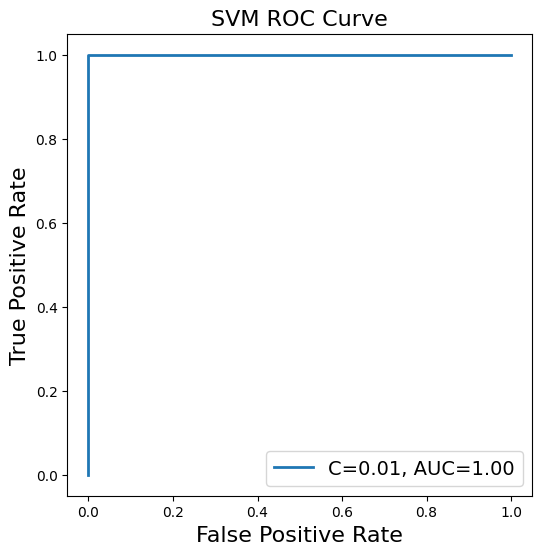

In [61]:
#construire la courbe ROC
fpr, tpr, thr = metrics.roc_curve(y_test, y_test_pred)

# calculer l'aire sous la courbe ROC
auc = metrics.auc(fpr, tpr)

# créer une figure
fig = plt.figure(figsize=(6, 6))

# afficher la courbe ROC
plt.plot(fpr, tpr, '-', lw=2, label='C=0.01, AUC=%.2f' % auc)

# donner un titre aux axes et au graphique
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('SVM ROC Curve', fontsize=16)

# afficher la légende
plt.legend(loc="lower right", fontsize=14)

# afficher l'image
plt.show()